## Fine structure using ceemd

Use `ceemd` to decompose spectrum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#import simlib1 as sl
import pyeemd as emd
from pyeemd.utils import plot_imfs

In [2]:
scaletype='fourier'
def powerspec(a,energy):
    tempft=a-np.mean(a)
    datafft=np.fft.fft(tempft)
    # calculate the fft power spectrum in the ROI on a wavelet scale (!)
    fftlen=len(datafft)
    Nf=fftlen       #1/7/11
    #print('nf',Nf)
    Nfplot=Nf//2-1
    chperE=1.0/(energy[1]-energy[0])
    # ************  0 freq in below?????????
    fftscale=np.fft.fftfreq(Nf,d=1.0/chperE) # in cycles/MeV
    #xfft0=np.arange(1.0,float(Nf//2),1.0)*chperE/Nf
    #if scaletype=="wavelet":
    #    xfft0=xfft0*3.0
    #xfft=1.0/xfft0  #/3.0
    pwrdata=(datafft*datafft.conjugate()).real/Nf
    pwrdata[1:Nf//2]=(pwrdata[1:Nf//2]+pwrdata[Nf-2:Nf//2-1:-1])/2.0
    pwrdata=pwrdata[0:Nfplot]
    #xfft=xfft[0:Nfplot]
    xfft=fftscale[0:Nfplot]
    return xfft,pwrdata


In [13]:
def plotamplitudes(e,imf,n,c,r):
    plt.subplot(n,c,r)
    plt.plot(e,imf)
    if n!=r: plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.ylim(-400.0,400.0)
    plt.yticks([-200,0,200])

def plotpower(e,imf,n,c,r,means,subplt=True):
    if subplt: plt.subplot(n,c,r)
    x,y=powerspec(imf,e)
    plt.plot(x,y)
    if subplt and n!=r: plt.setp(plt.gca().get_xticklabels(), visible=False)
    locs,labels=plt.yticks()
    plt.yticks([locs[0],locs[-2]])
    meanx=np.sum(x*y)/np.sum(y)
    plt.text(0.8,0.7,"%6.3f"%(meanx,),transform=plt.gca().transAxes)
    plt.axvline(meanx,color='r')
    means.append(meanx)
    return meanx


Placeholder

4400
(10, 1800)


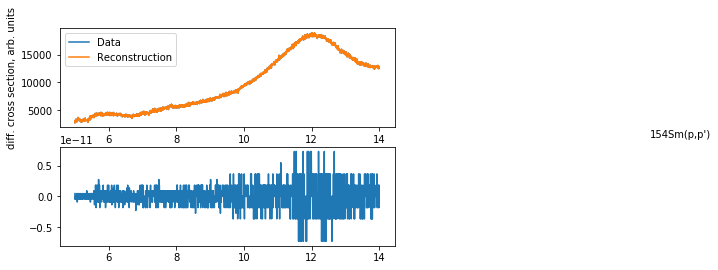

In [37]:
energy,data=np.loadtxt("../../da2016/Sm154/data_154Sm_all_5keV.dat",unpack=True,usecols=(0,1))
print( len(data))
data=data[400:2200]
energy=energy[400:2200]
dedc=(21.91-8.471)/(1800+1-279)
SaveFigures=False

imfs=emd.ceemdan(data, S_number=4, num_siftings=50, noise_strength=0.3)
print(np.shape(imfs))
recon=np.sum(imfs,axis=0)
plt.subplot(2,1,1)
plt.plot(energy,data,label="Data")
plt.plot(energy,recon,label="Reconstruction")
plt.legend()
plt.text(22,4,"154Sm(p,p')")
plt.xlabel("Excitation energy [MeV]")
plt.ylabel("diff. cross section, arb. units")
plt.subplot(2,1,2)
plt.plot(energy,data-recon)
if SaveFigures: plt.savefig("spec154.pdf")


Placeholder

17163.448262922775 3297.0825891879817


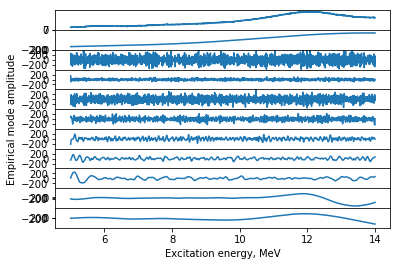

In [38]:
plt.subplots_adjust(hspace=0.0)
plotamplitudes(energy,data/20,11,1,1)
plt.ylim(0.0,1000.0)
plt.yticks([0.0,7.0])
print(np.amax(imfs[9]),np.amin(imfs[9]))
plotamplitudes(energy,imfs[9],11,1,2)
plt.ylim(0.0,20000.0)
plotamplitudes(energy,imfs[0],11,1,3)
plotamplitudes(energy,imfs[1],11,1,4)
plotamplitudes(energy,imfs[2],11,1,5)
plotamplitudes(energy,imfs[3],11,1,6)
plt.ylabel("Empirical mode amplitude")
plotamplitudes(energy,imfs[4],11,1,7)
plotamplitudes(energy,imfs[5],11,1,8)
plotamplitudes(energy,imfs[6],11,1,9)
plotamplitudes(energy,imfs[7],11,1,10)
plt.ylim(-3000.0,3000.0)
plotamplitudes(energy,imfs[8],11,1,11)
#plotamplitudes(energy,imfs[1]+imfs[3],11,1,11)
plt.ylim(-5000.0,5000.0)
plt.xlabel("Excitation energy, MeV")

if SaveFigures: plt.savefig("amplitude154.pdf")


Placeholder

means= [70.73298825048303, 32.5111417105165, 51.79524459369821, 23.510845009254073, 11.378038923794113, 5.422733755115135, 2.0802579600394666, 0.2767524812946278, 0.4644915505644127]


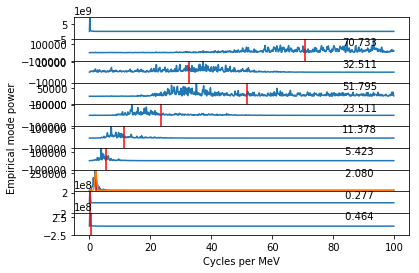

In [39]:
means=[]

#plotpower(energy,imfs[9],10,1,1,means)

plt.subplot(10,1,1)
x,y=powerspec(imfs[9],energy)
plt.plot(x,y)
plt.setp(plt.gca().get_xticklabels(), visible=False)
locs,labels=plt.yticks()
plt.yticks([locs[0],locs[-2]])
#plt.xlim(0.0,2.0)
#plt.ylim(-10.0,10.0)

plt.subplots_adjust(hspace=0.0)
plotpower(energy,imfs[0],10,1,2,means)
plotpower(energy,imfs[1],10,1,3,means)
plotpower(energy,imfs[2],10,1,4,means)
plotpower(energy,imfs[3],10,1,5,means)
plotpower(energy,imfs[4],10,1,6,means)
plt.ylabel("Empirical mode power")
plotpower(energy,imfs[5],10,1,7,means)
meanx=plotpower(energy,imfs[6],10,1,8,means)
x6,y6=powerspec(imfs[6],energy)
morlet=np.amax(y6)*np.exp(-(x6-meanx)**2/(meanx/5.0)**2)
plt.plot(x6,morlet)
plotpower(energy,imfs[7],10,1,9,means)
plotpower(energy,imfs[8],10,1,10,means)
#plt.xlabel("Excitation energy, MeV")
plt.xlabel("Cycles per MeV")

if SaveFigures: plt.savefig("power154.pdf")

print('means=',means)


(0.0, 102431.10843416637)

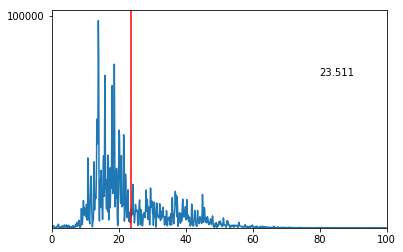

In [40]:
plotpower(energy,imfs[3],10,1,2,means,subplt=False)
plt.xlim(0.0,100.0)
plt.ylim(ymin=0.0)

Placeholder

alpha= 0.2904600496332765


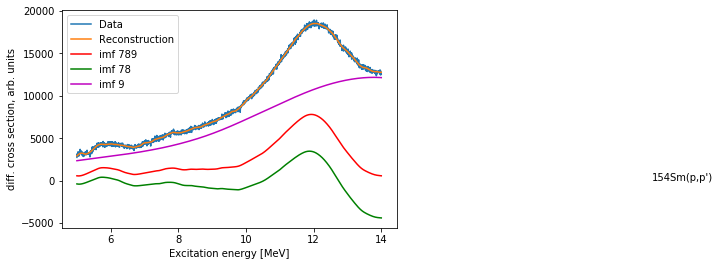

In [41]:
recon=imfs[7]+imfs[8]+imfs[9]+imfs[6]
plt.plot(energy,data,label="Data")
plt.plot(energy,recon,label="Reconstruction")
prepeak=imfs[8]+imfs[7]
alpha=(prepeak[-1]-prepeak[0])/(imfs[9][0]-imfs[9][-1])
peak=prepeak+alpha*imfs[9]
back=(1.0-alpha)*imfs[9]
#plt.plot(energy,imfs[8]+imfs[7]+imfs[9]*0.27,'r-',label="imf 789")
#plt.plot(energy,imfs[8]+imfs[7],'g-',label="imf 78")
plt.plot(energy,peak,'r-',label="imf 789")
plt.plot(energy,imfs[8]+imfs[7],'g-',label="imf 78")
plt.plot(energy,back,'m-',label="imf 9")
plt.legend(loc=2)
plt.text(22,4,"154Sm(p,p')")
plt.xlabel("Excitation energy [MeV]")
plt.ylabel("diff. cross section, arb. units")
print("alpha=",alpha)